# <h1> CLUSTERING ON MOVIE LENS DATASET</h1><br>
Name: Ujjwal Gupta<br>
Reg No:16BCE1034


MovieLens is a web-based recommender system and virtual community that recommends movies for its users to watch, based on their film preferences using collaborative filtering of members' movie ratings and movie reviews. It contains about 11 million ratings for about 8500 movies.MovieLens was created in 1997 by GroupLens Research, a research lab in the Department of Computer Science and Engineering at the University of Minnesota,in order to gather research data on personalized recommendations.



In [43]:
import pandas as pd
import numpy as np


In [44]:
ratings=["user_id","movie_id","ratings","timestamp"]
df3=pd.read_table('u.data',sep='\t',names=ratings)
#df=pd.read_table("u.data",sep="\t",header=None)

c:\python36\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead.
  


In [45]:
df=df3.pivot_table(columns=['movie_id'],index=['user_id'],values=['ratings'])
df1=df.fillna(value=0)
lf=[]

# User-User Clustering (K-Means)

In [46]:
for i in range(df1.shape[0]):
    l=list(df1.iloc[i,:])
    lf.append(l)

In [47]:
from sklearn.cluster import KMeans
x=np.array(lf)
#no of clusters: n
n=15
km = KMeans(n_clusters=n, 
            init='random', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0).fit(x)

In [48]:
ck=[]
for i in range(n):
    c=[]
    ck.append(c)
for i in range(len(km.labels_)):
    ck[km.labels_[i]].append(i)
for i in ck:
    print(len(i))

25
3
25
28
66
36
246
21
36
2
150
68
6
196
35


# Item-Item Clustering (K-Means)

In [59]:
lt=[]
for i in range(df1.shape[1]):
    l=list(df1.iloc[:,i])
    lt.append(l)

In [60]:
y=np.array(lt)
km1 = KMeans(n_clusters=n, 
            init='random', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0).fit(y)

In [61]:
ck1=[]
for i in range(n):
    c=[]
    ck1.append(c)
for i in range(len(km1.labels_)):
    ck1[km1.labels_[i]].append(i)
for i in ck1:
    print(len(i))

27
31
40
21
40
121
21
951
40
74
8
198
62
9
39


# User-User Clustering (K-Means++)

In [52]:
km2 = KMeans(n_clusters=n, 
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0).fit(x)

In [53]:
ck2=[]
for i in range(n):
    c=[]
    ck2.append(c)
for i in range(len(km2.labels_)):
    ck2[km2.labels_[i]].append(i)
for i in ck2:
    print(len(i))

14
24
129
24
25
22
175
123
26
42
77
9
27
48
178


# Item-Item Clustering(K-Means++) 

In [56]:
km3 = KMeans(n_clusters=n, 
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0).fit(y)

In [57]:
ck3=[]
for i in range(n):
    c=[]
    ck3.append(c)
for i in range(len(km3.labels_)):
    ck3[km3.labels_[i]].append(i)
for i in ck3:
    print(len(i))

42
9
24
81
80
227
16
39
1010
19
33
8
2
15
77


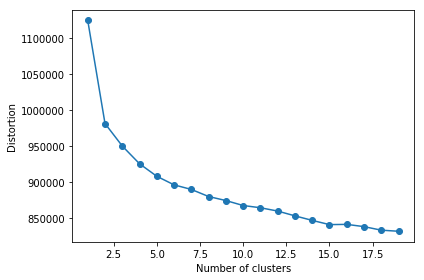

In [42]:
import matplotlib.pyplot as plt
from IPython.display import Image
%matplotlib inline
distortions = []
for i in range(1, 20):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(x)
    distortions.append(km.inertia_)
plt.plot(range(1, 20), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
#plt.savefig('./figures/elbow.png', dpi=300)
plt.show()

# Hierarchical Clustering

In [72]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
row_clusters = linkage(df1.values, method='complete', metric='euclidean')
print(row_clusters.shape[0])
pd.DataFrame(row_clusters,
             columns=['row label 1', 'row label 2',
                      'distance', 'no. of items in clust.'],
             index=['cluster %d' % (i + 1)
                    for i in range(row_clusters.shape[0])])

942


,row label 1,row label 2,distance,no. of items in clust.
cluster 1,407.0,897.0,9.899495,2.0
cluster 2,154.0,823.0,13.038405,2.0
cluster 3,104.0,625.0,13.076697,2.0
cluster 4,684.0,944.0,13.674794,3.0
cluster 5,655.0,865.0,13.820275,2.0
cluster 6,204.0,739.0,13.964240,2.0
cluster 7,509.0,831.0,14.106736,2.0
cluster 8,808.0,925.0,14.177447,2.0
cluster 9,301.0,569.0,14.212670,2.0
cluster 10,142.0,355.0,14.282857,2.0


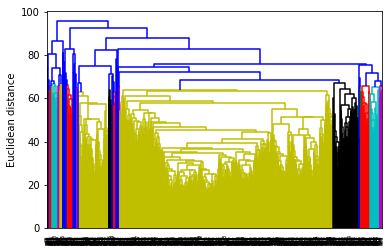

In [73]:
row_dendr = dendrogram(row_clusters)
#plt.tight_layout()
plt.ylabel('Euclidean distance')
#plt.savefig('./figures/dendrogram.png', dpi=300, 
#            bbox_inches='tight')
plt.show()